In [38]:
import numpy as np
import matplotlib.pyplot as plt

rho_sea_level=1.225  #kg/m^3
rho_cruise=0.4135  #kg/m^3

# V_inf=int(input("Enter free stream velocity:"))
# root_c=int(input("Enter root chord:"))
# tip_c=int(input("Enter tip chord:"))
# b=int(input("Enter span:"))
# alpha=int(input("Enter Angle of Attack:"))
V_inf=20
root_c=2
tip_c=2
b=6
alpha=5
rho=rho_cruise
print(V_inf, root_c, tip_c, b, alpha)

20 2 2 6 5


In [39]:
Vinf_Vec=V_inf*np.array([[np.cos(np.deg2rad(alpha)),0,np.sin(np.deg2rad(alpha))]])
n_vec=np.array([0,0,1])
d=np.dot(Vinf_Vec,n_vec)

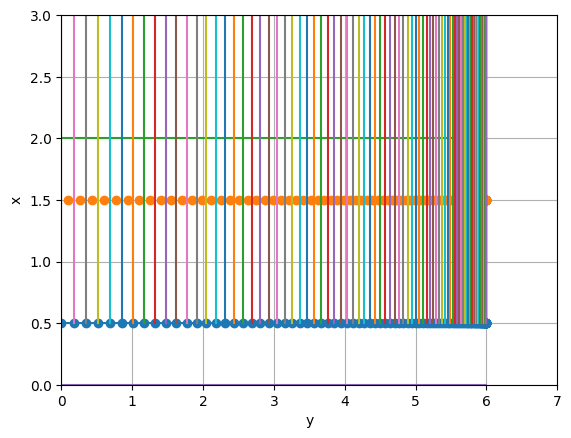

In [45]:
n=100
a=np.linspace(0,1,n+1)
y=b*(1-(1-a)**3)
#print("Y-Coordinates:",y)
y_cp=[]
for i in range(len(y)-1):
  y_cp+=[(y[i]+y[i+1])/2]
y_cp=([round(float(x), 3) for x in y_cp])

#print("Y_CP COordinates:",y_cp)

x_BV=[]
for i in range(n+1):
  point=root_c/4 + (3/4)*(root_c-tip_c)*y[i]/b
  x_BV.append(point)
x_Cp=[]
for i in range(len(y_cp)):
  point=3*root_c/4 + (1/4)*(root_c-tip_c)*y_cp[i]/b
  x_Cp.append(point)


#print("X-Coordinates:",x_BV)
#print("X_CP:",x_Cp)

plt.plot(y,x_BV,'o-')
plt.plot(y_cp,x_Cp,'o')
plt.xlim(0, b)
plt.ylim(0, root_c)
plt.xlabel('y')
plt.ylabel('x')

m, c = 0,root_c
x = np.linspace(0, b, 100)
plt.plot(x, m*x + c)

m, c = 0,7.5
x = np.linspace(0, b, 100)
plt.plot(x, m*x + c)

m, c = (-tip_c+root_c)/b ,0
x = np.linspace(0, b, 100)
plt.plot(x, m*x + c)
plt.xlim(0, b+1)
plt.ylim(0, root_c+1)
plt.grid()

for i in range(len(y)-1):
  plt.plot([y[i],y[i]], [x_BV[i],root_c+1])
plt.plot([b,b],[tip_c,root_c])
plt.show()

AIC=np.zeros((n,n))
for i in range (n):
  for j in range(n):
    r1=np.array([x_BV[j]-x_Cp[i],y[j]-y_cp[i],0])
    r2=np.array([x_BV[j+1]-x_Cp[i],y[j+1]-y_cp[i],0])
    xhat=np.array([1,0,0])

    mag_r1 = np.linalg.norm(r1)
    mag_r2 = np.linalg.norm(r2)

    dot_p=np.dot(r1,r2)
    cross_p=np.cross(r1,r2)
    cross_r1_x=np.cross(r1,xhat)
    cross_r2_x=np.cross(r2,xhat)
    ft= ((cross_p)*(1/mag_r1+1/mag_r2))/(mag_r1*mag_r2 + dot_p)
    st= (cross_r1_x)/(mag_r1*mag_r1 - mag_r1*np.dot(r1,xhat))
    tt= ((cross_r2_x)/((mag_r2 - np.dot(r2,xhat))*(mag_r2)))
    Vij=(1/(4*np.pi))*(ft+st-tt)

    AIC[i,j]=np.dot(Vij,n_vec).item()

In [46]:
rhs = np.zeros(n)
for i in range(n):
  rhs[i] = -d.item()
gamma=np.linalg.solve(AIC,rhs)

In [47]:
sum = 0
for i in range(n):
  sum += (gamma[i] * (y[i+1] - y[i]))
Lift = rho * V_inf * sum
print("LIFT=",Lift)
area=0.5*(root_c+tip_c)*b
Cl=Lift/(rho*V_inf**2*area)
print("CL=",Cl)

LIFT= 1034.9321924426388
CL= 0.5214289562891168


In [48]:
w_vec=np.dot(AIC,gamma)
sum=0
for i in range(n):
  sum += (gamma[i] * w_vec[i] * (y[i+1] - y[i]))
Drag = rho * V_inf * sum
print("Drag=",Drag)
area=0.5*(root_c+tip_c)*b
Cd=Drag/(rho*V_inf**2*area)
print("CD=",Cd)

Drag= -1883.448802172573
CD= -0.948936317096218
